# In this project, you will learn practically how to choose the best features that help us to identify pulsar star using    Data analysis & data visualization  and then using these features in  logistic regression model   .

We will go through 4 tasks to implement our project:

Task 1: Importing libraries and Exploring the Dataset.

Task 2: Checking missing values.

Task 3: Creating visual methods to analyze the data.

Task 4: make logistic regression model


## Step.1: Importing libraries and dataset

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [35]:
pulsar=pd.read_csv('pulsar_stars.csv')

In [36]:
pulsar.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [37]:
 pulsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Expected output:

    The data consists of 17898 instances with 9 attributes.
    8 float type, 1 integar type
    no missing data

In [50]:
pulsar.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,17898.0,111.079968,25.652935,5.812500,100.929688,115.078125,127.085938,192.617188
Standard deviation of the integrated profile,17898.0,46.549532,6.843189,24.772042,42.376018,46.947479,51.023202,98.778911
Excess kurtosis of the integrated profile,17898.0,0.477857,1.064040,-1.876011,0.027098,0.223240,0.473325,8.069522
Skewness of the integrated profile,17898.0,1.770279,6.167913,-1.791886,-0.188572,0.198710,0.927783,68.101622
Mean of the DM-SNR curve,17898.0,12.614400,29.472897,0.213211,1.923077,2.801839,5.464256,223.392141
Standard deviation of the DM-SNR curve,17898.0,26.326515,19.470572,7.370432,14.437332,18.461316,28.428104,110.642211
Excess kurtosis of the DM-SNR curve,17898.0,8.303556,4.506092,-3.139270,5.781506,8.433515,10.702959,34.539844
Skewness of the DM-SNR curve,17898.0,104.857709,106.514540,-1.976976,34.960504,83.064556,139.309330,1191.000837
target_class,17898.0,0.091574,0.288432,0.000000,0.000000,0.000000,0.000000,1.000000


## Step 2: Checking missing values and outliers

In [39]:
pulsar.isna().apply(pd.value_counts)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
False,17898,17898,17898,17898,17898,17898,17898,17898,17898


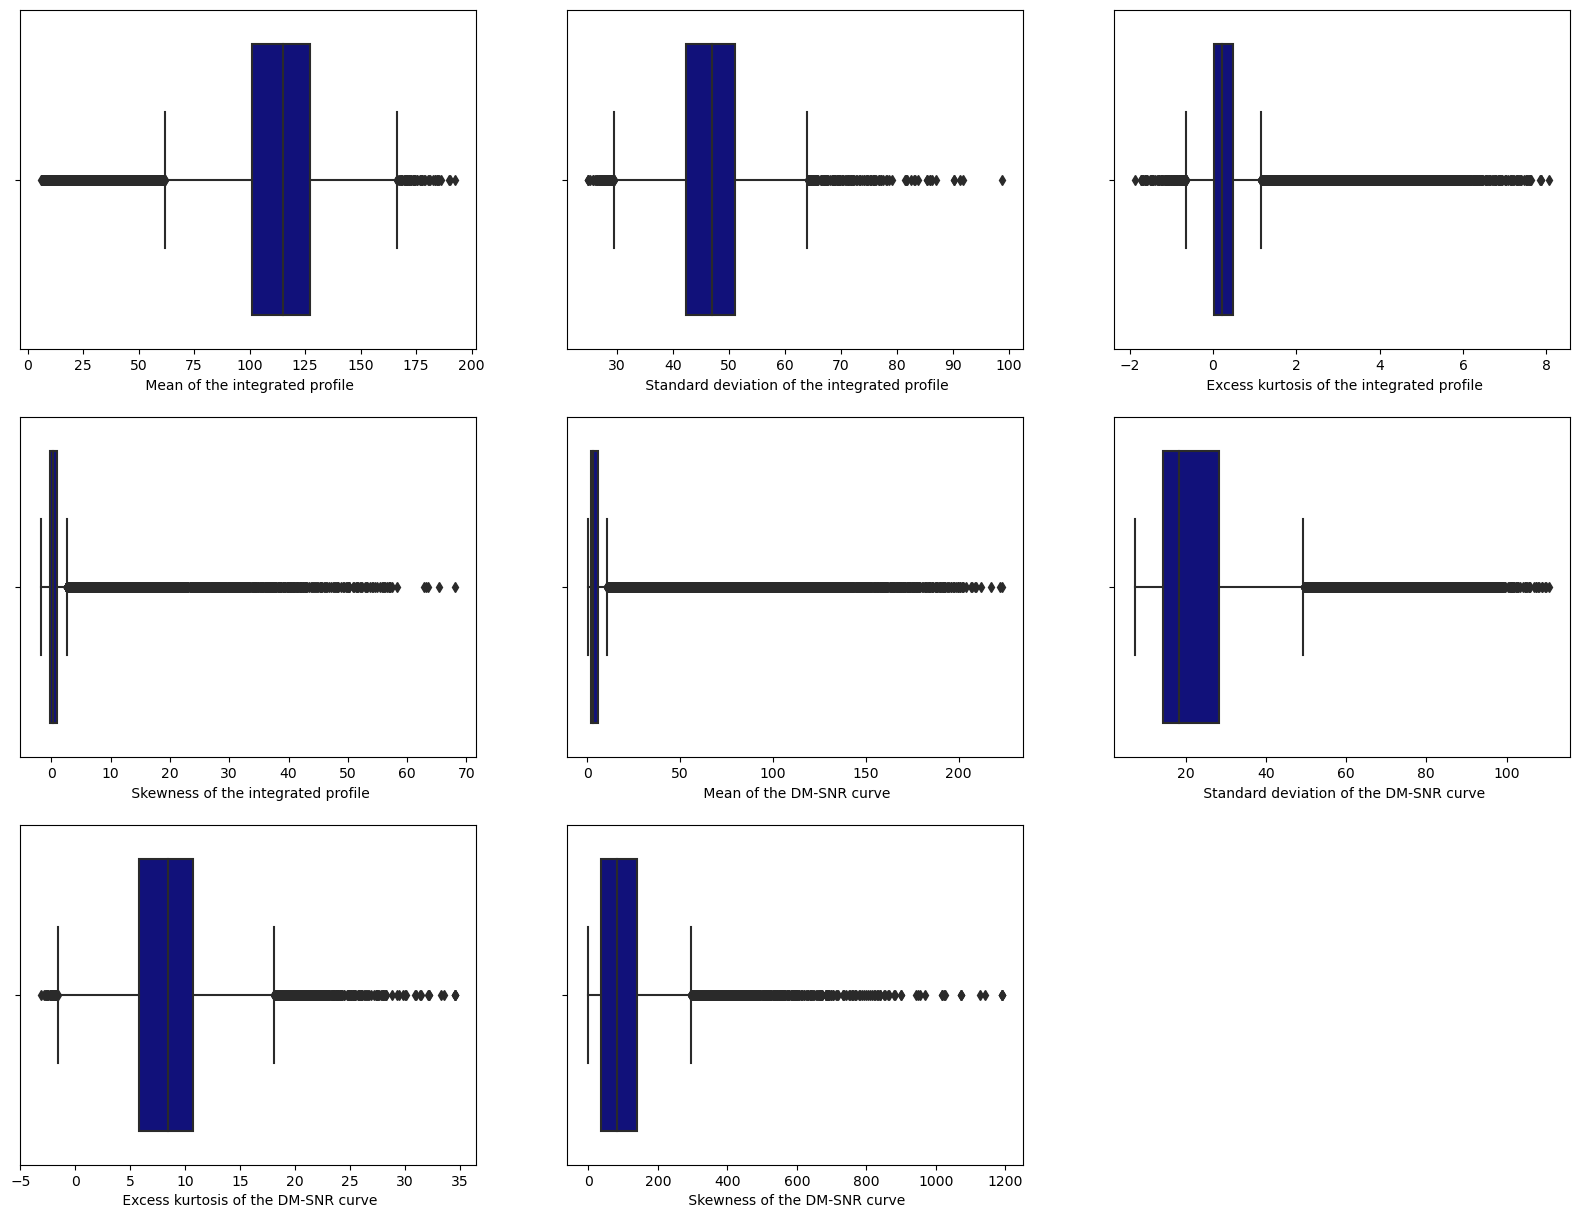

In [18]:
# Checking outliers from boxplot
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= pulsar[' Mean of the integrated profile'],color='darkblue')

plt.subplot(3,3,2)
sns.boxplot(x= pulsar[' Standard deviation of the integrated profile'], color='darkblue')

plt.subplot(3,3,3)
sns.boxplot(x= pulsar[' Excess kurtosis of the integrated profile'], color='darkblue')

plt.subplot(3,3,4)
sns.boxplot(x= pulsar[' Skewness of the integrated profile'], color='darkblue')

plt.subplot(3,3,5)
sns.boxplot(x= pulsar[' Mean of the DM-SNR curve'], color='darkblue')

plt.subplot(3,3,6)
sns.boxplot(x= pulsar[' Standard deviation of the DM-SNR curve'], color='darkblue')

plt.subplot(3,3,7)
sns.boxplot(x= pulsar[' Excess kurtosis of the DM-SNR curve'], color='darkblue')

plt.subplot(3,3,8)
sns.boxplot(x= pulsar[' Skewness of the DM-SNR curve'], color='darkblue')

plt.show()

Nearly all the parameters have outliers so we need to make normalization on data 

## Step 3: creating visual methods to analyze the data

In [ ]:
sns.pairplot(data=pulsar)

In [40]:
pulsar.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Standard deviation of the integrated profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean of the DM-SNR curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
Standard deviation of the DM-SNR curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
Excess kurtosis of the DM-SNR curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness of the DM-SNR curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


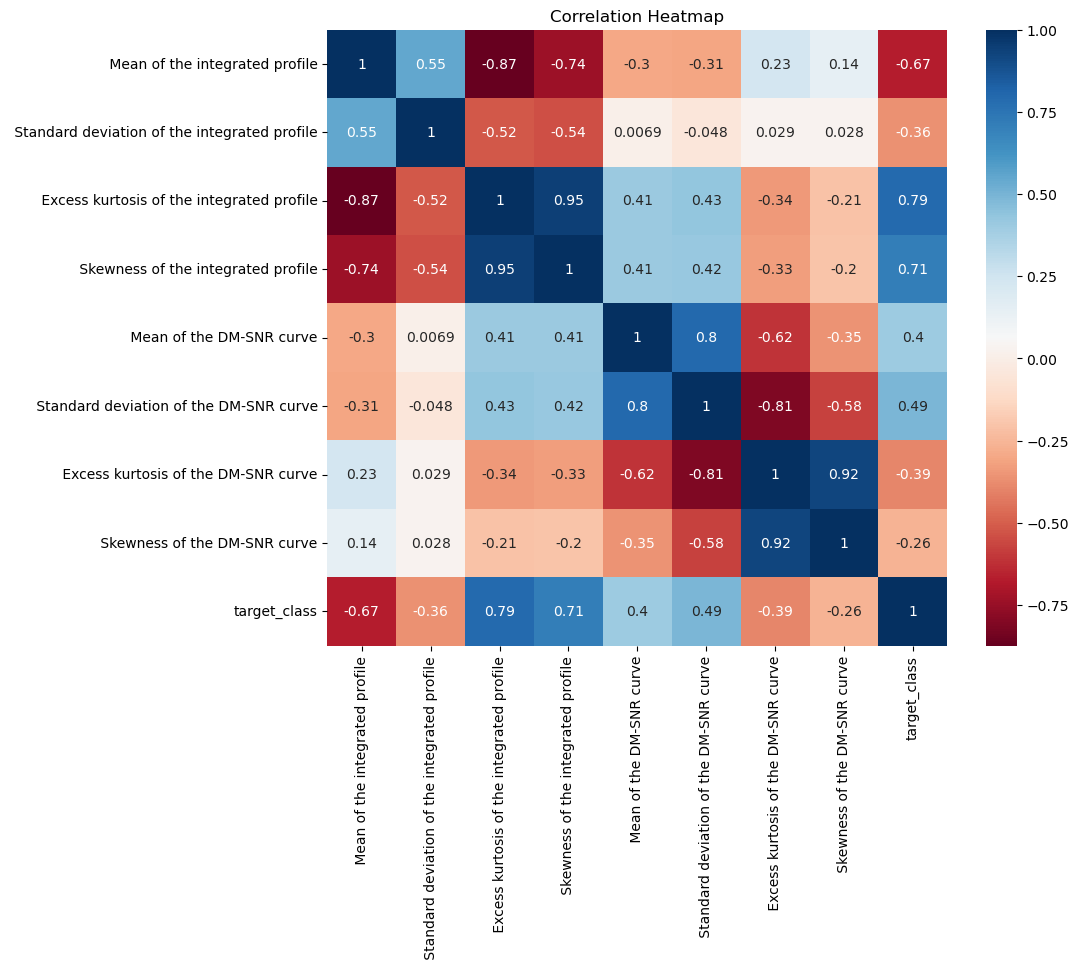

In [117]:
plt.figure(figsize=(10, 8))
sns.heatmap(pulsar.corr(), annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.show()

The most correlated features with the target_class are : Mean of the integrated profile,  Excess kurtosis of the integrated profile,  Skewness of the integrated profile,  Standard deviation of the DM-SNR curve

In [24]:
pulsar['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

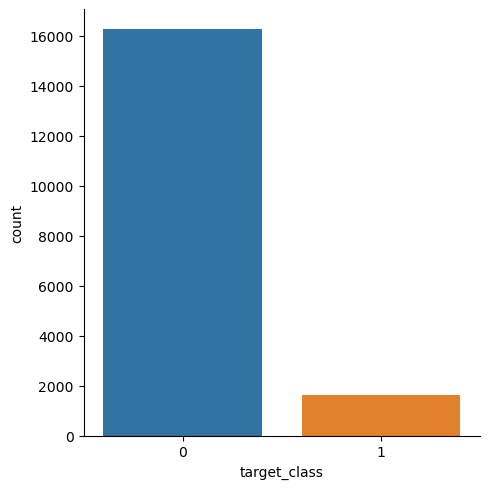

In [111]:
sns.catplot(x='target_class',data=pulsar,kind='count')

## Step 4: applying logistic regression model

In [128]:
# Assigning x & y
X = pulsar[[' Mean of the integrated profile',' Excess kurtosis of the integrated profile',' Skewness of the integrated profile',' Standard deviation of the DM-SNR curve',' Mean of the DM-SNR curve']].values
y = pulsar[['target_class']].values

In [129]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 41)

In [130]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [131]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\dell-5580\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [132]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [133]:
cm

array([[4054,   28],
       [  75,  318]], dtype=int64)

In [134]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9769832402234637

In [135]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4082
           1       0.92      0.81      0.86       393

    accuracy                           0.98      4475
   macro avg       0.95      0.90      0.92      4475
weighted avg       0.98      0.98      0.98      4475



# Accuracy for this model is 98%